<a href="https://colab.research.google.com/github/SSNSeawolf21/compass-clock/blob/master/Predicting_Stock_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing the packages
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler

#used for setting the output figure size
rcParams['figure.figsize'] = 20,10

#to normalize the given input data
scaler = MinMaxScaler(feature_range=(0, 1))

#to read input data set (place the file name inside  ' ') as shown below
todataframe = pd.read_csv('TSLA.csv')

#to print the first few data in the data set
todataframe.head()

Saving TSLA.csv to TSLA (2).csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-29,66.222000,66.251999,65.500000,65.987999,65.987999,12328000
1,2019-12-02,65.879997,67.276001,65.737999,66.973999,66.973999,30372500
2,2019-12-03,66.524002,67.582001,66.438004,67.239998,67.239998,32868500
3,2019-12-04,67.550003,67.571999,66.570000,66.606003,66.606003,27665000
4,2019-12-05,66.566002,66.884003,65.449997,66.073997,66.073997,18623000


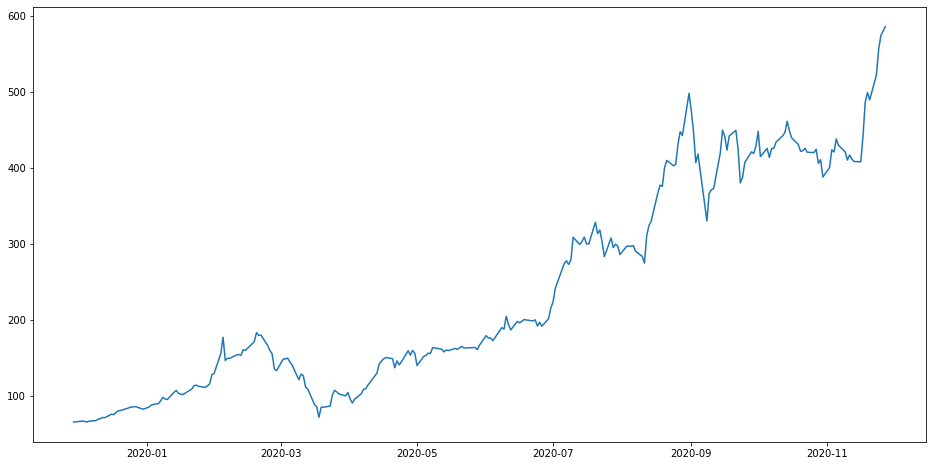

In [14]:
todataframe['Date'] = pd.to_datetime(todataframe.Date,format='%Y-%m-%d')
todataframe.index = todataframe['Date']
plt.figure(figsize=(16,8))
plt.plot(todataframe['Close'], label='Closing Price')

In [18]:
#importing the packages 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
#dataframe creation
seriesdata = todataframe.sort_index(ascending=True, axis=0)
new_seriesdata = pd.DataFrame(index=range(0,len(todataframe)),columns=['Date','Close'])
length_of_data=len(seriesdata)
for i in range(0,length_of_data):
    new_seriesdata['Date'][i] = seriesdata['Date'][i]
    new_seriesdata['Close'][i] = seriesdata['Close'][i]
#setting the index again
new_seriesdata.index = new_seriesdata.Date
new_seriesdata.drop('Date', axis=1, inplace=True)
#creating train and test sets this comprises the entire data’s present in the dataset
myseriesdataset = new_seriesdata.values
totrain = myseriesdataset[0:255,:]
tovalid = myseriesdataset[255:,:]
#converting dataset into x_train and y_train
scalerdata = MinMaxScaler(feature_range=(0, 1))
scale_data = scalerdata.fit_transform(myseriesdataset)
x_totrain, y_totrain = [], []
length_of_totrain=len(totrain)
for i in range(60,length_of_totrain):
    x_totrain.append(scale_data[i-60:i,0])
    y_totrain.append(scale_data[i,0])
x_totrain, y_totrain = np.array(x_totrain), np.array(y_totrain)
x_totrain = np.reshape(x_totrain, (x_totrain.shape[0],x_totrain.shape[1],1))
#LSTM neural network
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_totrain.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adadelta')
lstm_model.fit(x_totrain, y_totrain, epochs=3, batch_size=1, verbose=2)
#predicting next data stock price
myinputs = new_seriesdata[len(new_seriesdata) - (len(tovalid)+1) - 60:].values
myinputs = myinputs.reshape(-1,1)
myinputs  = scalerdata.transform(myinputs)
tostore_test_result = []
for i in range(60,myinputs.shape[0]):
    tostore_test_result.append(myinputs[i-60:i,0])
tostore_test_result = np.array(tostore_test_result)
tostore_test_result = np.reshape(tostore_test_result,(tostore_test_result.shape[0],tostore_test_result.shape[1],1))
myclosing_priceresult = lstm_model.predict(tostore_test_result)
myclosing_priceresult = scalerdata.inverse_transform(myclosing_priceresult)

Epoch 1/3
192/192 - 4s - loss: 0.2016
Epoch 2/3
192/192 - 4s - loss: 0.1922
Epoch 3/3
192/192 - 4s - loss: 0.1834


In [19]:
print(len(tostore_test_result));
print(myclosing_priceresult);

1
[[118.480034]]
